# Testing and regularization

In [110]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 358 (delta 59), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (358/358), 42.64 MiB | 18.56 MiB/s, done.
Resolving deltas: 100% (182/182), done.
/content/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression


In [138]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

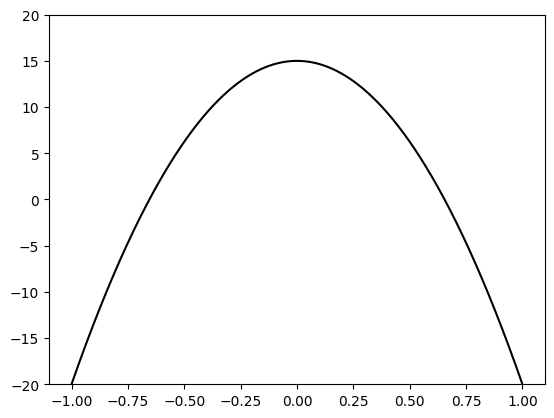

In [139]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [140]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

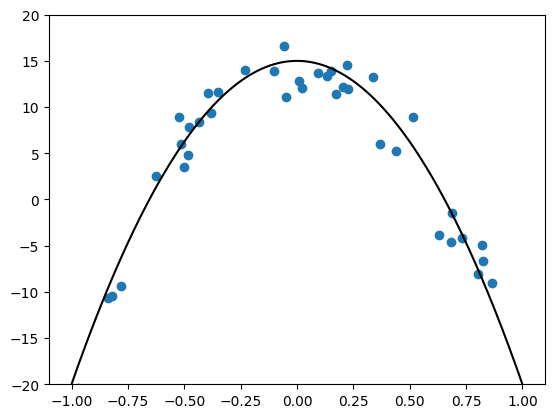

In [141]:
plt.scatter(X, Y)
draw_polynomial(coefs)

## Training a polynomial regression model

In [142]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [149]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    model = PolynomialFeatures(degree=polyDegree,include_bias=False)
    X =model.fit_transform(X.reshape(-1,1))
    return X
X_poly=addPoly(X,200)

In [150]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 100)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [163]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,200)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)


In [164]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [165]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data

model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)

LinearRegression()

Training error (rmse): 0.5021603134748135
Testing error (rmse): 6031852.598066654


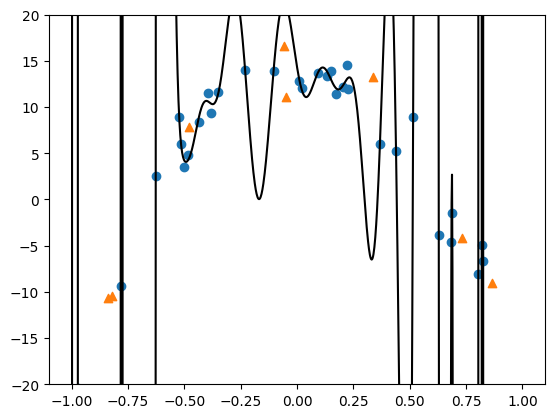

Polynomial coefficients
[14.380955395192496, -150.54619067068953, 1096.947142093283, 23022.917471837776, -167158.12709298765, -1059851.0120530215, 7171983.841137485, 24500947.20775801, -143037130.66408786, -338580291.851852, 1564242282.8826776, 2931788574.8204565, -10063360919.336588, -15887373258.659887, 38683163051.41199, 52090322497.14409, -84786962251.19148, -93597779268.7732, 85751199357.19736, 62251404329.5736, 6988289964.869613, 41419136670.96826, -58296540805.823814, -39447282544.51514, -27097357901.732536, -46644432542.38863, 24417210024.205147, -4896454949.17553, 43547023304.72211, 28404814694.298588, 29397047094.865917, 32768752115.405087, 1834953745.1969314, 17509036898.21248, -21862351819.42922, -1509478331.0119681, -33861428091.899242, -14238225526.022022, -33980715540.95925, -18002354785.273495, -25836705316.74466, -14646631111.185966, -13814627172.88527, -7489267350.882737, -1458325571.9173808, 509695008.9846613, 9032871562.351774, 7426551950.288224, 16683839393.799757,

In [166]:
display_results(model_no_reg)

Training error (rmse): 0.4937587335458202
Testing error (rmse): 277352574.92450887


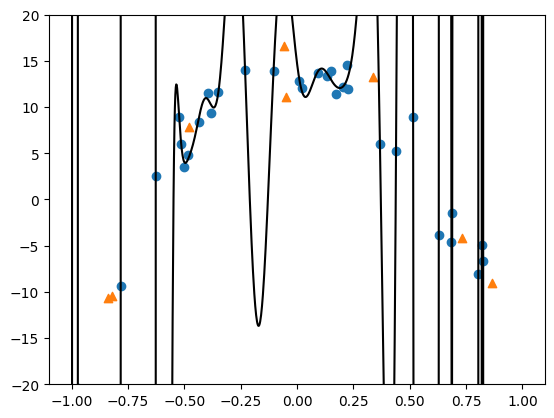

Polynomial coefficients
[14.786731456310145, -195.60476833222353, 2138.5058656258875, 24582.63833012956, -335171.9581220152, -582636.2787161594, 15340397.64332881, -3513998.204499221, -343882182.7868364, 297358282.60854393, 4503576494.196227, -4593500062.542133, -36799165737.430786, 35601934778.37354, 189931561321.76447, -159065208671.15527, -600688664672.2395, 414735884184.0575, 1046006878140.489, -561934194707.5068, -634653184723.4423, 163603313922.991, -571823760924.9623, 398180513249.94745, 415851840545.7256, -44948796072.34054, 658043331098.5067, -365971295677.2696, 198810738811.90076, -298996035782.8574, -303940617455.8557, -22642092670.73407, -502132297295.9523, 240680366384.76196, -418112422908.9819, 381284010536.4143, -211545461662.64545, 389625186676.39795, -14871010251.498058, 303952292862.29315, 111644274511.46501, 171643523184.94897, 163131499477.5771, 31711644774.613007, 160319976901.76306, -91146395167.67381, 128443920610.2058, -184807909215.57718, 87913250680.91858, -24

In [167]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,100)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 0.49928580446807536
Testing error (rmse): 52727134.080772564


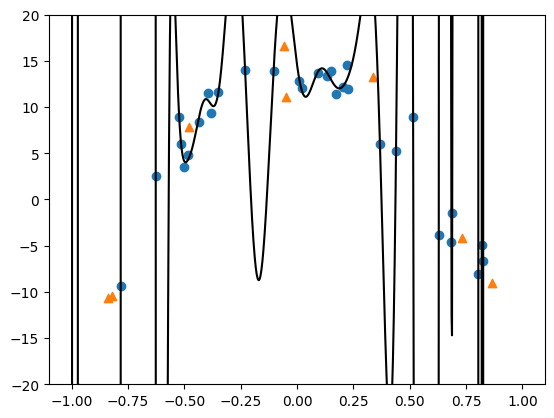

Polynomial coefficients
[14.632490371257655, -179.25837946074273, 1787.6650722943057, 23941.138201192425, -279326.7959428954, -744393.636336957, 12726796.397481559, 6112951.485213024, -282932264.7531811, 77529811.31619734, 3664772622.361272, -1963737967.3709886, -29679071088.922024, 17286342294.451523, 152998374131.09314, -82179000410.39648, -490433256803.5888, 225511406090.72443, 891980886201.7815, -331687672532.5093, -641955880907.6768, 149184671804.6796, -378003443366.64105, 195711531511.9181, 478822739753.9012, -96510511513.22116, 491305556739.99884, -205936275740.7276, -34770395117.58526, -82735573923.52403, -420725358300.8316, 90848124056.7057, -427719521265.1205, 183768377181.83392, -183488101299.09134, 170710866171.1086, 102238717474.1902, 87087287096.18219, 292023006010.34656, -17963587639.799026, 344384237131.47955, -105686366486.08665, 276796219712.8928, -151707516711.67798, 130698342045.98836, -146870435911.41428, -55017101963.43819, -91743098488.5842, -251505495029.51065, 

In [168]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,50)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 0.5018947713521987
Testing error (rmse): 4860837.2743046135


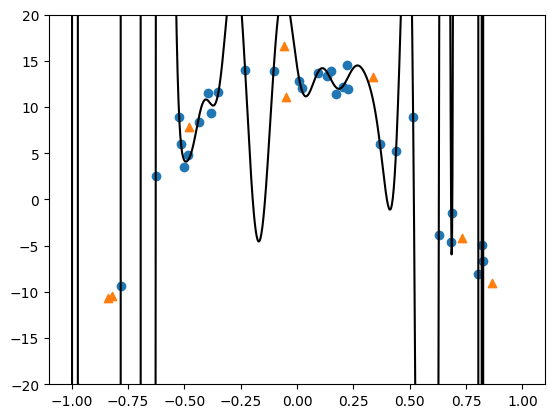

Polynomial coefficients
[14.45201322892367, -161.34382689817852, 1457.8964425743486, 22650.55730524857, -224974.2417846651, -834346.1092884442, 10041585.873491969, 12793188.353403557, -216362209.85064572, -80998692.19280617, 2693282377.357199, -77331863.96616249, -20953636996.956406, 4530427256.72886, 104757810786.153, -31033149116.383907, -332508841940.0591, 106038945836.87682, 624215235485.5502, -191043716547.56842, -533888144990.0508, 131143725121.90865, -130470994987.17563, 82967974670.62175, 411814130980.5303, -101713047386.84647, 193222803604.58514, -98540222779.51251, -226431478533.5615, 21041400812.114532, -315476494811.8071, 95694221101.25085, -83314006681.4359, 71434496767.86967, 195275911767.78806, -7149273535.906676, 288154528728.6834, -64348214156.627556, 110929854601.17345, -36178040166.253975, -305213480535.415]


In [169]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,40)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 0.7317562621358569
Testing error (rmse): 1560.894677157027


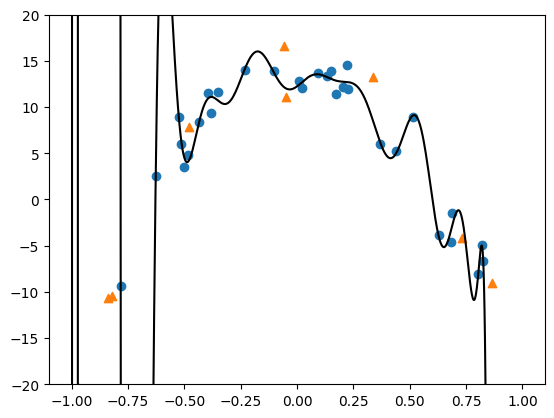

Polynomial coefficients
[12.236364793168969, 17.94085233167172, 166.90541795778586, -2585.9170133506545, -3275.437313956724, 85686.48179959487, -7104.133872488076, -1225883.7333149242, 558556.0159420813, 9061094.0582134, -5452206.401247925, -37517460.80048552, 25335942.908206888, 89473053.68597363, -63837716.29183569, -120926421.1743922, 87738968.94368081, 85550151.06586114, -61067555.35601266, -24565110.75271381, 16667926.565872967]


In [170]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,20)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 1.7891709300116547
Testing error (rmse): 3.626889069912134


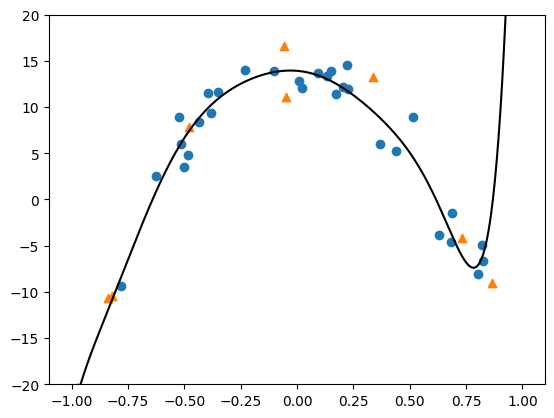

Polynomial coefficients
[13.924602793046116, -1.984272789229007, -34.365000927008495, -14.117571374656194, 43.67707182355309, 125.97801842804098, -179.67623759304354, -316.03473707158145, 144.4480524429957, 261.0202843140582, 43.13574459866319]


In [171]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,10)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 1.8807702496989311
Testing error (rmse): 2.1132966300952387


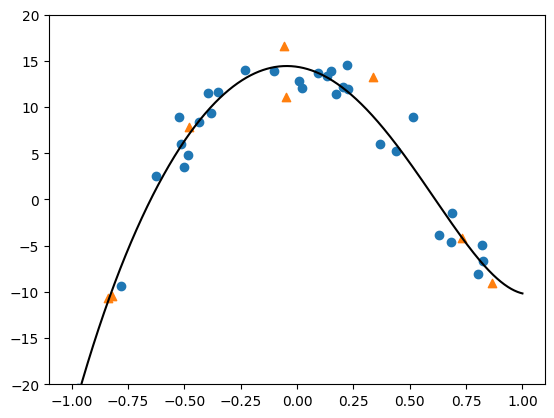

Polynomial coefficients
[14.3623594465151, -3.5425624966596923, -38.73387294280698, 3.0211185427832348, 7.398991352267373, 7.327156481464936]


In [172]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,5)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 2.2333263285249005
Testing error (rmse): 2.0600079460717926


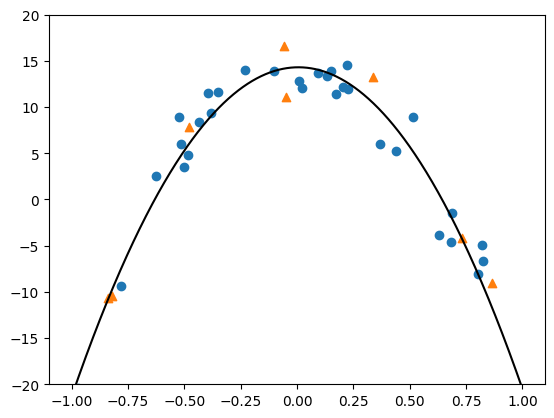

Polynomial coefficients
[14.306067026975485, 0.4440729816395376, -35.24060355757654]


In [173]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,2)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 1.9145836120422892
Testing error (rmse): 2.0321328607197198


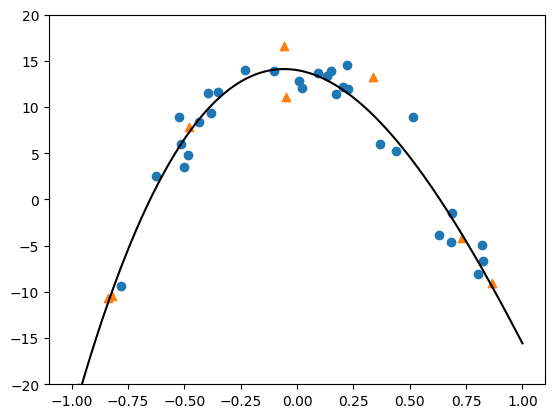

Polynomial coefficients
[14.001254838330022, -3.940636496817938, -33.75149294228027, 8.119951204302055]


In [174]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,3)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 1.8902534841050338
Testing error (rmse): 2.130057412817275


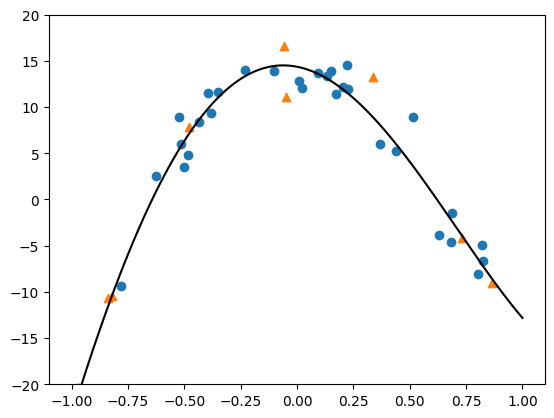

Polynomial coefficients
[14.367096405714369, -4.745651068809445, -37.99586029496481, 10.084928188733436, 5.473580386900184]


In [175]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,4)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

Training error (rmse): 1.8807702496989311
Testing error (rmse): 2.1132966300952387


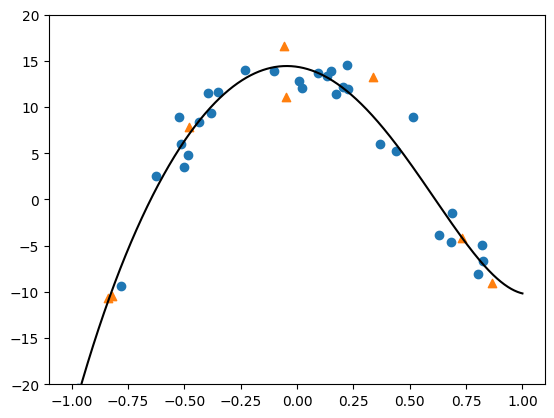

Polynomial coefficients
[14.3623594465151, -3.5425624966596923, -38.73387294280698, 3.0211185427832348, 7.398991352267373, 7.327156481464936]


In [176]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_poly=addPoly(X,5)
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=0.2,random_state=42)
model_no_reg =LinearRegression()
model_no_reg.fit(X_train,y_train)
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [125]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
model_L1_reg =linear_model.Lasso(alpha=0.001)
model_L1_reg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.295e+00, tolerance: 3.187e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

Training error (rmse): 1.7900542031604556
Testing error (rmse): 2.4726588191100336


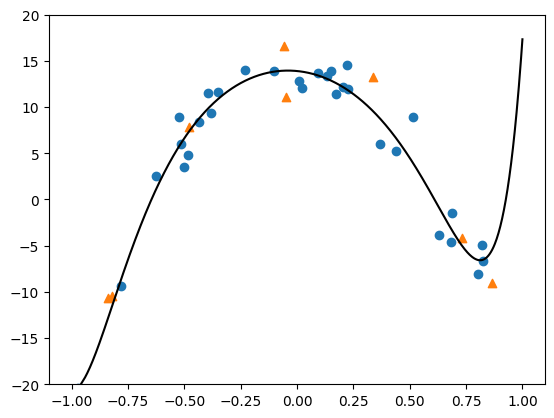

Polynomial coefficients
[13.901726377686995, -2.3650289682121812, -29.360993776657818, -0.0, -16.74452810335355, 0.8973935302453563, -0.0, 11.22438035603392, 7.789119645232353, 4.807452404699062, 14.554410079697739, 4.3680991974433505, 8.324659145452015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.06041835759179223, -0.23528721676036238, 0.22675496723155267, -0.21816218490629824, 0.2099424811877564, -0.2017316661635197, 0.19382440844620563, -0.18597134940372015, 0.17837233828356364, -0.17085640733666618, 0.16355873853715003, -0.15636186436031144, 0.14935689342237796, -0.14246286570046676, 0.13574087517503816, -0.129134874

In [126]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [127]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg =linear_model.Ridge(alpha=.01)
model_L2_reg.fit(X_train,y_train)

Ridge(alpha=0.01)

Training error (rmse): 1.7905246275344273
Testing error (rmse): 2.6640350095477325


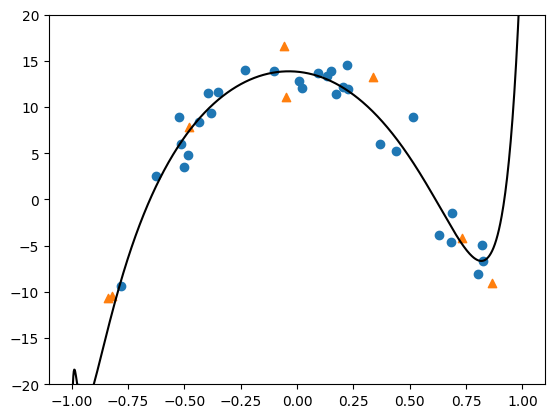

Polynomial coefficients
[13.830735181954708, -2.1789340128731283, -30.101332247076044, -1.4346331091155378, -10.926396378064, 3.961291628347915, -0.8106007615081978, 6.723194281432924, 3.0134492557136667, 6.784714736318699, 4.1942692507294375, 5.500098764060397, 4.233709681018816, 3.9197524262937717, 3.8279907537738467, 2.5247698159844436, 3.3014560365389194, 1.4486892027926004, 2.7927586684237404, 0.6761687668108101, 2.351175432912914, 0.1468427414989728, 1.986010727081517, -0.20218214466355455, 1.6906151498625173, -0.42289730022935323, 1.4533983440319247, -0.554498341290774, 1.2625205146616105, -0.6252386004024792, 1.1076421105705254, -0.6550017709292426, 0.9803669514303115, -0.6575902294838967, 0.8741470909141178, -0.642502281532499, 0.7840006131275494, -0.6162329397655828, 0.7061963377675138, -0.5831983159072873, 0.637967337991233, -0.5463824234006633, 0.5772730516484863, -0.5077859466649137, 0.522611337442143, -0.4687361369918168, 0.4728745792246025, -0.4301002096163735, 0.4272418

In [128]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [129]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.336306,13.258006,-6.278048e+00,9.582543,9.519216
1,-0.479015,7.824063,4.439285e+00,7.352728,7.402155
2,0.730620,-4.157484,-8.402028e+03,-4.956984,-4.768478
3,-0.839108,-10.658485,-1.466719e+07,-12.927514,-14.053558
4,-0.046806,11.139395,2.096609e+01,13.948019,13.866870
5,-0.055715,16.612588,2.131280e+01,13.942191,13.858836
6,-0.820351,-10.449481,-3.476118e+06,-11.564321,-12.289243
7,0.865668,-9.073495,7.991021e+06,-5.449796,-5.564468


### Real Example (Predict fuel efficiency)

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [131]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [132]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [133]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [134]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [135]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [136]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
